# Carga de Paquetes y Librerias

In [1]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
# split a univariate sequence into samples
def TrainingSet(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# Carga de Base de Datos

In [4]:
#cargar datos desde drive acceso libre
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-06-19 21:42:01--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 172.217.194.101, 172.217.194.138, 172.217.194.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d1s1hmkqp0qr5ln6cbvkah4tpbuo3l0n/1687210875000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=48b43f48-831d-448b-a339-52754dc56f03 [following]
--2023-06-19 21:42:03--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/d1s1hmkqp0qr5ln6cbvkah4tpbuo3l0n/1687210875000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=48b43f48-831d-448b-a339-52754dc56f03
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 142.251.10.1

In [5]:
ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [6]:
df1=pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

In [7]:
df1 = df1.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df1.set_index(date_rng[0:-1], inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

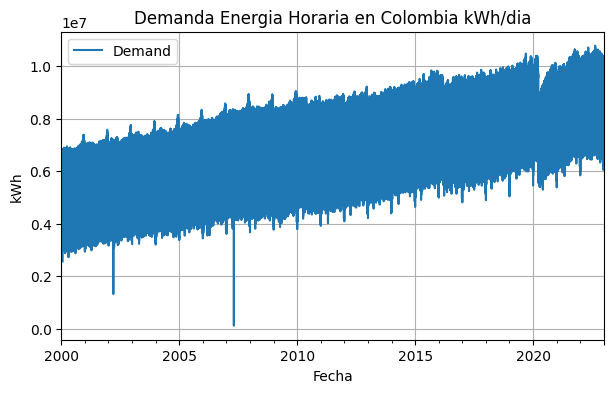

In [9]:
df1.plot(kind='line',figsize=(7,4),title='Demanda Energia Horaria en Colombia kWh/dia', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2000-01-01','2022-12-31'))


<Axes: title={'center': 'Demanda Energia Horaria en Colombia kWh/dia'}, xlabel='Fecha', ylabel='kWh'>

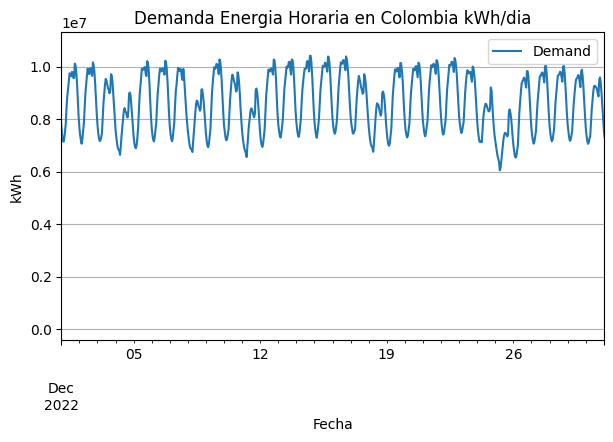

In [10]:
df1.plot(kind='line',figsize=(7,4),title='Demanda Energia Horaria en Colombia kWh/dia', grid=True, ylabel='kWh', xlabel='Fecha',xlim=('2022-12-01','2022-12-31'))

# Normalizacion


In [11]:
Ts1=df1['2020-10-01':'2022-12-31'].values # Un año
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [12]:
# #  Normalizar
# Ts1 = (Ts1-min(Ts1))/(max(Ts1)-min(Ts1))
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(Ts1)
Ts1=scaler.transform(Ts1)

# Modelos DL


## Time Step=1

### Conjunto de Entrenamiento

In [13]:
#  Particion X,Y y Time_step/step_back/window
step_back = 1

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1.reshape(len(X_test1),step_back)
X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1=Y_test1.reshape(len(Y_test1),step_back)
Y_train1=Y_train1.reshape(len(Y_train1),step_back)


In [14]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15781, 1) Tamaño Y_train1:  (15781, 1)
Tamaño X_test1:  (3946, 1) Tamaño Y_test1:  (3946, 1)
-----------------------------------------------------------------------


In [15]:
# Nuemero de Epocas
N=100
bsz=512

In [16]:
callbacks = [keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, verbose=1),]

### LSTM

In [17]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=X_train1.shape),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15781, 100)        40800     
                                                                 
 lstm_1 (LSTM)               (None, 15781, 100)        80400     
                                                                 
 lstm_2 (LSTM)               (None, 15781, 100)        80400     
                                                                 
 lstm_3 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 202,008
Trainable params: 202,008
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 13s 65ms/step - loss: 0.3211 - mae: 0.5299 - mse: 0.3211 - val_loss: 0.3143 - val_mae: 0.5284 - val_mse: 0.3143 - lr: 0.0010
Epoc

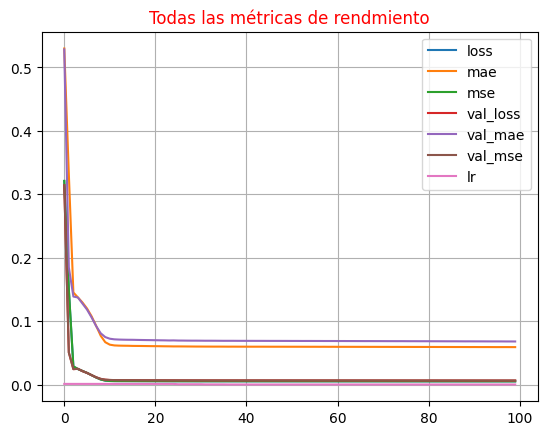

In [18]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [19]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100,input_shape=X_train1.shape),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15781, 100)        200       
                                                                 
 dense_1 (Dense)             (None, 15781, 100)        10100     
                                                                 
 dense_2 (Dense)             (None, 15781, 100)        10100     
                                                                 
 dense_3 (Dense)             (None, 15781, 1)          101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 16ms/step - loss: 0.0415 - mae: 0.1502 - mse: 0.0415 - val_loss: 0.0098 - val_mae: 0.0820 - val_mse: 0.0098 - lr: 0.0010
Epoch

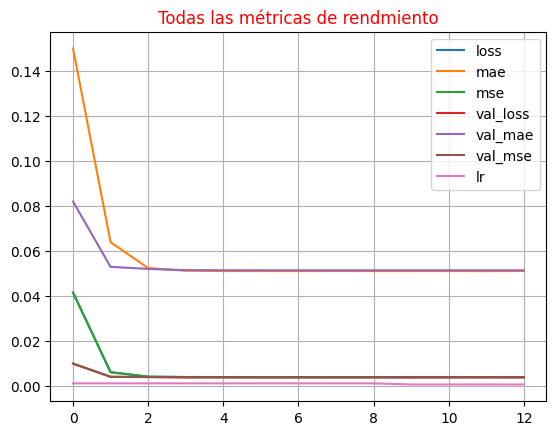

In [20]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [21]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=X_train1.shape),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15781, 100)        30900     
                                                                 
 gru_1 (GRU)                 (None, 15781, 100)        60600     
                                                                 
 gru_2 (GRU)                 (None, 15781, 100)        60600     
                                                                 
 gru_3 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 152,409
Trainable params: 152,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 56ms/step - loss: 0.1652 - mae: 0.3420 - mse: 0.1652 - val_loss: 0.0258 - val_mae: 0.1430 - val_mse: 0.0258 - lr: 0.0010
Epo

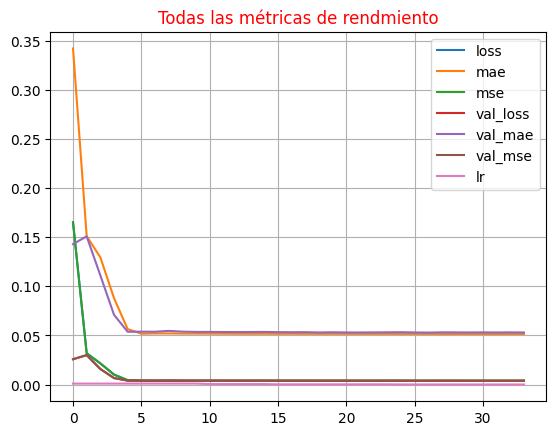

In [22]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [23]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=X_train1.shape),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15781, 100)        10200     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 15781, 100)        20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 15781, 100)        20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 50,502
Trainable params: 50,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 4s 29ms/step - loss: 0.0362 - mae: 0.1460 - mse: 0.0362 - val_loss: 0.0136 - val_mae: 0.0958 - val_mse: 0.0136 - lr: 0.0010
Epoch

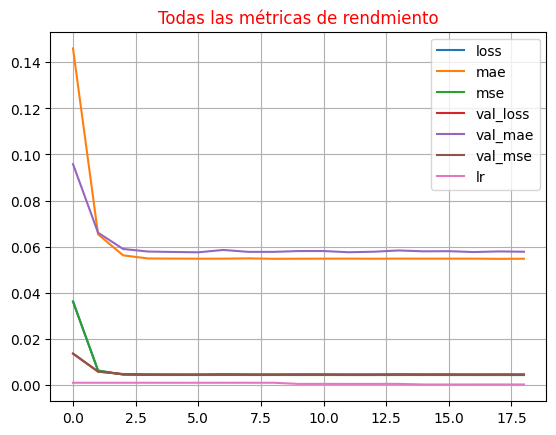

In [24]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

## Medidas de Rendimiento

124/124 [==============================] - 0s 3ms/step


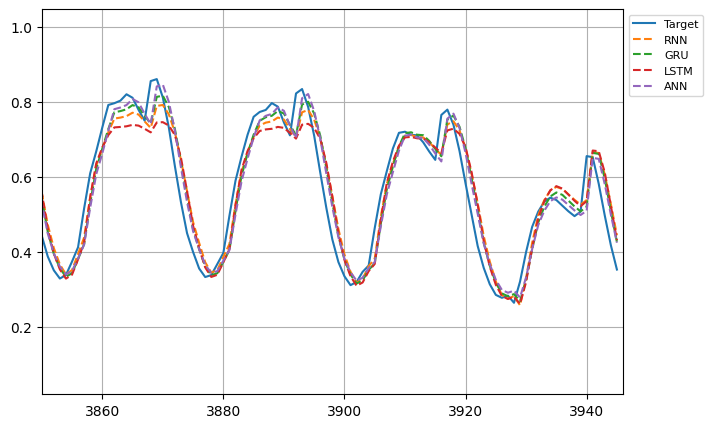

╒═════════════╤════════════╤═════════════╤═════════════╤════════════╕
│ Metrics     │        RNN │         GRU │        LSTM │        ANN │
╞═════════════╪════════════╪═════════════╪═════════════╪════════════╡
│ MSE         │ 0.07041    │ 0.06387     │ 0.08561     │ 0.06113    │
├─────────────┼────────────┼─────────────┼─────────────┼────────────┤
│ RMSE        │ 0.00495726 │ 0.00407933  │ 0.00732906  │ 0.0037366  │
├─────────────┼────────────┼─────────────┼─────────────┼────────────┤
│ MAE         │ 0.06047    │ 0.0544      │ 0.07287     │ 0.05119    │
├─────────────┼────────────┼─────────────┼─────────────┼────────────┤
│ R2          │ 0.87705    │ 0.89882     │ 0.81822     │ 0.90732    │
├─────────────┼────────────┼─────────────┼─────────────┼────────────┤
│ cnSMAPE     │ 0.89601    │ 0.90499     │ 0.88312     │ 0.90875    │
├─────────────┼────────────┼─────────────┼─────────────┼────────────┤
│ P_Value_PS  │ 0          │ 0           │ 0           │ 0          │
├─────────────┼─────

In [25]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL = [forecasting_RNN, forecasting_GRU, forecasting_LSTM,forecasting_ANN.reshape(forecasting_ANN.shape[0],1)]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL)):
  plt.plot(forecasting_DL[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))




## TimeStep =24

### Conjunto de Entrenamiento


In [26]:
#  Particion X,Y y Time_step/step_back/window
step_back = 24

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
# X_test1=X_test1.reshape(len(X_test1),step_back)
# X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
# Y_test1=Y_test1.reshape(len(Y_test1),step_back)
# Y_train1=Y_train1.reshape(len(Y_train1),step_back)

### LSTM

In [27]:
model_LSTM = keras.models.Sequential([
                                     keras.layers.LSTM(100, return_sequences=True, input_shape=(step_back,1)),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(100, return_sequences=True),
                                     keras.layers.LSTM(1)
])
model_LSTM.summary()

# Training

model_LSTM.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_LSTM.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 24, 100)           80400     
                                                                 
 lstm_6 (LSTM)               (None, 24, 100)           80400     
                                                                 
 lstm_7 (LSTM)               (None, 1)                 408       
                                                                 
Total params: 202,008
Trainable params: 202,008
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 71ms/step - loss: 0.0753 - mae: 0.2223 - mse: 0.0753 - val_loss: 0.0452 - val_mae: 0.1836 - val_mse: 0.0452 - lr: 0.0010
Epo

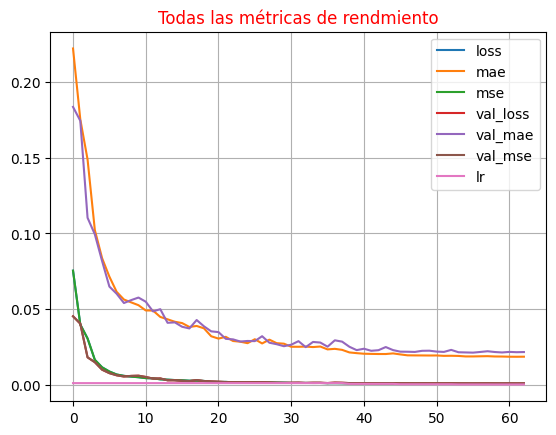

In [28]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### ANN

In [29]:
model_ANN = keras.models.Sequential([
                                     keras.layers.Dense(100,input_shape=(step_back,)),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(100),
                                     keras.layers.Dense(1)
])
model_ANN.summary()

# Training

model_ANN.compile(loss="mse", optimizer="adam", metrics=['mae', 'mse'])
history = model_ANN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2500      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 2s 11ms/step - loss: 0.0522 - mae: 0.1720 - mse: 0.0522 - val_loss: 0.0136 - val_mae: 0.1000 - val_mse: 0.0136 - lr: 0.0010
Epoch

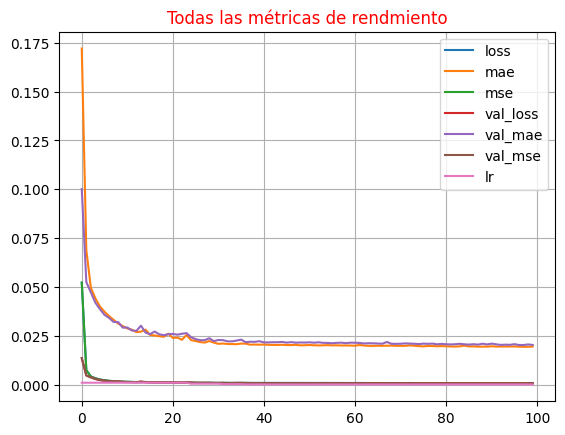

In [30]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### GRU

In [31]:
model_GRU = keras.models.Sequential([
                                     keras.layers.GRU(100, return_sequences=True, input_shape=(step_back,1)),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(100, return_sequences=True),
                                     keras.layers.GRU(1)
])
model_GRU.summary()

# Training
metrics=['mae', 'mse']

model_GRU.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_GRU.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 100)           30900     
                                                                 
 gru_5 (GRU)                 (None, 24, 100)           60600     
                                                                 
 gru_6 (GRU)                 (None, 24, 100)           60600     
                                                                 
 gru_7 (GRU)                 (None, 1)                 309       
                                                                 
Total params: 152,409
Trainable params: 152,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 9s 64ms/step - loss: 0.0745 - mae: 0.2153 - mse: 0.0745 - val_loss: 0.0298 - val_mae: 0.1444 - val_mse: 0.0298 - lr: 0.0010
Epo

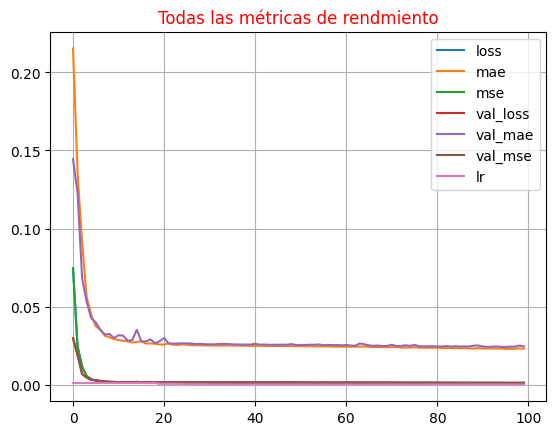

In [32]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

### RNN

In [33]:
model_RNN = keras.models.Sequential([
                                     keras.layers.SimpleRNN(100, return_sequences=True, input_shape=(step_back,1)),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(100, return_sequences=True),
                                     keras.layers.SimpleRNN(1)
])
model_RNN.summary()

# Training

metrics=['mae', 'mse']
model_RNN.compile(loss="mse", optimizer="adam", metrics=metrics)
history = model_RNN.fit(X_train1, Y_train1, epochs=N, batch_size=bsz, callbacks=callbacks, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 24, 100)           10200     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 24, 100)           20100     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 24, 100)           20100     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1)                 102       
                                                                 
Total params: 50,502
Trainable params: 50,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 7s 106ms/step - loss: 0.0621 - mae: 0.1499 - mse: 0.0621 - val_loss: 0.0133 - val_mae: 0.0992 - val_mse: 0.0133 - lr: 0.0010
Epoc

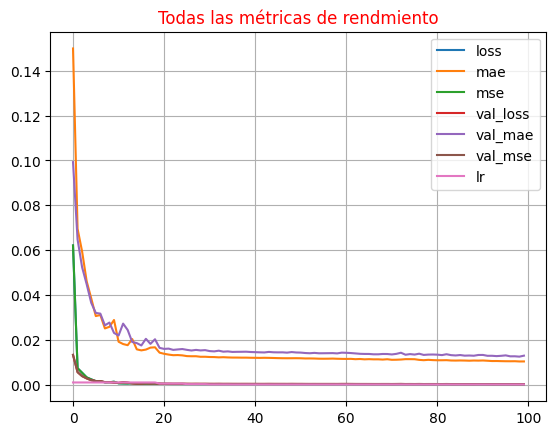

In [34]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

# Rendimiento

124/124 [==============================] - 0s 1ms/step


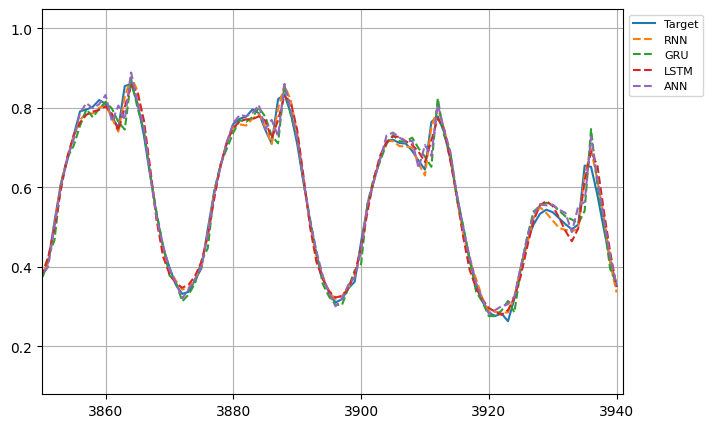

╒═════════════╤═════════════╤════════════╤═════════════╤═════════════╕
│ Metrics     │         RNN │        GRU │        LSTM │         ANN │
╞═════════════╪═════════════╪════════════╪═════════════╪═════════════╡
│ MSE         │ 0.01779     │ 0.03569    │ 0.02892     │ 0.02779     │
├─────────────┼─────────────┼────────────┼─────────────┼─────────────┤
│ RMSE        │ 0.000316449 │ 0.00127361 │ 0.000836237 │ 0.000772372 │
├─────────────┼─────────────┼────────────┼─────────────┼─────────────┤
│ MAE         │ 0.0136      │ 0.02563    │ 0.02172     │ 0.02044     │
├─────────────┼─────────────┼────────────┼─────────────┼─────────────┤
│ R2          │ 0.99216     │ 0.96845    │ 0.97928     │ 0.98087     │
├─────────────┼─────────────┼────────────┼─────────────┼─────────────┤
│ cnSMAPE     │ 0.97681     │ 0.95825    │ 0.96151     │ 0.96548     │
├─────────────┼─────────────┼────────────┼─────────────┼─────────────┤
│ P_Value_PS  │ 0           │ 0          │ 0           │ 0           │
├─────

In [35]:
forecasting_RNN  = model_RNN.predict(X_test1)
forecasting_GRU  = model_GRU.predict(X_test1)
forecasting_LSTM = model_LSTM.predict(X_test1)
forecasting_ANN = model_ANN.predict(X_test1)

forecasting_DL2 = [forecasting_RNN, forecasting_GRU, forecasting_LSTM,forecasting_ANN.reshape(forecasting_ANN.shape[0],1)]
model_names_DL = ['RNN', 'GRU', 'LSTM','ANN']

plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target')
for i in range(len(forecasting_DL2)):
  plt.plot(forecasting_DL2[i], label=model_names_DL[i], linestyle='--')
plt.xlim(3850,len(forecasting_DL2[i])) # 3850
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()

col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var = ['Metrics','RNN', 'GRU', 'LSTM','ANN'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'], ['P_Value_Var']
for k in range(4):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_DL2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_DL2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_DL2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_DL2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_DL2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value)
  correlation, p_value = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_DL2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))


